# COVID19

Import necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Define utilities

In [2]:
def clean_dataframe(df):
    df.data = pd.to_datetime(df.data)
    df.drop(['stato', 'ricoverati_con_sintomi', 'isolamento_domiciliare', 'note_it', 'note_en'],
            axis = 'columns',
            errors = 'ignore',
            inplace = True)
    return df

In [3]:
def get_rate(data):
    return np.diff(data) / data[1:]

In [4]:
def plot_with_rate(x, y, x_label, y1_label):
    y_rate = get_rate(y)
    y2_label = y1_label + ' rate'
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.fill_between(x, y, color='#1f77b4')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(x[1:], y_rate, color='#ff7f0e')
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y1_label)
    ax2.set_ylabel(y2_label)
    ax1.grid()
    ax1.legend([y1_label, y2_label])
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

In [5]:
from datetime import datetime
def print_with_rate(x, y, label):
    days = 7
    diff = np.diff(y)
    rate = diff / y[1:] * 100.
    x = x[-days:].tolist()
    y = y[-days:].tolist()
    diff = diff[-days:].tolist()
    rate = rate[-days:].tolist()
    print('{} trend of last {} days:'.format(label, days))
    for i in range(0, days):
        print('{} | {:6d} | {:+5d} ({:+00.2f}%)'.format(x[i].strftime("%d %b"), y[i], diff[i], rate[i]))

## Italy

In [6]:
italy = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')
italy = clean_dataframe(italy)

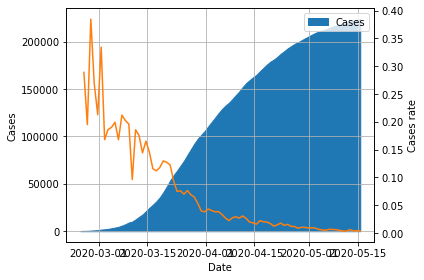

Cases trend of last 7 days:
09 May | 218268 | +1083 (+0.50%)
10 May | 219070 |  +802 (+0.37%)
11 May | 219814 |  +744 (+0.34%)
12 May | 221216 | +1402 (+0.63%)
13 May | 222104 |  +888 (+0.40%)
14 May | 223096 |  +992 (+0.44%)
15 May | 223885 |  +789 (+0.35%)


In [7]:
plot_with_rate(italy.data, italy.totale_casi, 'Date', 'Cases')
print_with_rate(italy.data, italy.totale_casi, 'Cases')

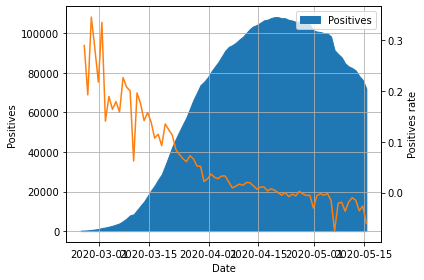

Positives trend of last 7 days:
09 May |  84842 | -3119 (-3.68%)
10 May |  83324 | -1518 (-1.82%)
11 May |  82488 |  -836 (-1.01%)
12 May |  81266 | -1222 (-1.50%)
13 May |  78457 | -2809 (-3.58%)
14 May |  76440 | -2017 (-2.64%)
15 May |  72070 | -4370 (-6.06%)


In [8]:
plot_with_rate(italy.data, italy.totale_positivi, 'Date', 'Positives')
print_with_rate(italy.data, italy.totale_positivi, 'Positives')

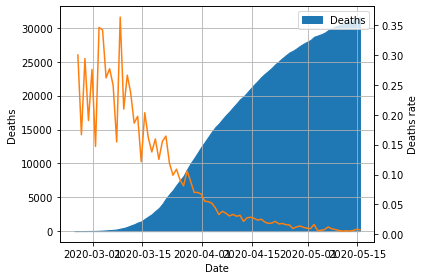

Deaths trend of last 7 days:
09 May |  30395 |  +194 (+0.64%)
10 May |  30560 |  +165 (+0.54%)
11 May |  30739 |  +179 (+0.58%)
12 May |  30911 |  +172 (+0.56%)
13 May |  31106 |  +195 (+0.63%)
14 May |  31368 |  +262 (+0.84%)
15 May |  31610 |  +242 (+0.77%)


In [9]:
plot_with_rate(italy.data, italy.deceduti, 'Date', 'Deaths')
print_with_rate(italy.data, italy.deceduti, 'Deaths')

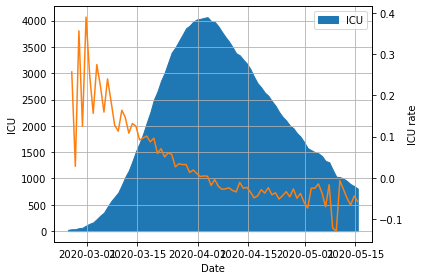

ICU trend of last 7 days:
09 May |   1034 |  -134 (-12.96%)
10 May |   1027 |    -7 (-0.68%)
11 May |    999 |   -28 (-2.80%)
12 May |    952 |   -47 (-4.94%)
13 May |    893 |   -59 (-6.61%)
14 May |    855 |   -38 (-4.44%)
15 May |    808 |   -47 (-5.82%)


In [10]:
plot_with_rate(italy.data, italy.terapia_intensiva, 'Date', 'ICU')
print_with_rate(italy.data, italy.terapia_intensiva, 'ICU')

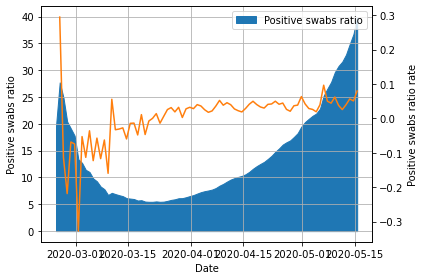

In [11]:
plot_with_rate(italy.data, italy.tamponi / italy.totale_positivi, 'Date', 'Positive swabs ratio')

## Piedmont

In [12]:
regions = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')
regions = clean_dataframe(regions)

In [13]:
piedmont = regions.query('denominazione_regione == "Piemonte"')

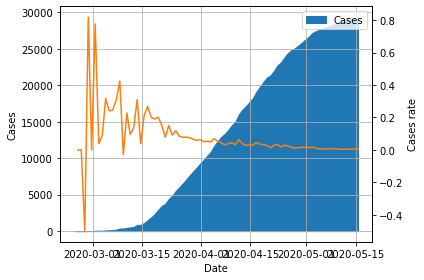

Cases trend of last 7 days:
09 May |  28549 |  +181 (+0.63%)
10 May |  28665 |  +116 (+0.40%)
11 May |  28776 |  +111 (+0.39%)
12 May |  28889 |  +113 (+0.39%)
13 May |  29058 |  +169 (+0.58%)
14 May |  29209 |  +151 (+0.52%)
15 May |  29346 |  +137 (+0.47%)


In [14]:
plot_with_rate(piedmont.data, piedmont.totale_casi, 'Date', 'Cases')
print_with_rate(piedmont.data, piedmont.totale_casi, 'Cases')

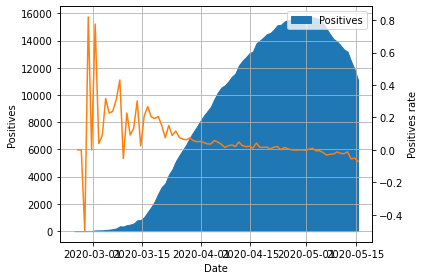

Positives trend of last 7 days:
09 May |  13934 |  -173 (-1.24%)
10 May |  13650 |  -284 (-2.08%)
11 May |  13338 |  -312 (-2.34%)
12 May |  13184 |  -154 (-1.17%)
13 May |  12491 |  -693 (-5.55%)
14 May |  11891 |  -600 (-5.05%)
15 May |  11113 |  -778 (-7.00%)


In [15]:
plot_with_rate(piedmont.data, piedmont.totale_positivi, 'Date', 'Positives')
print_with_rate(piedmont.data, piedmont.totale_positivi, 'Positives')

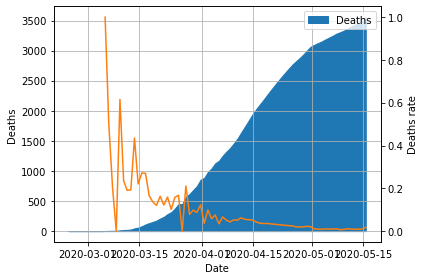

Deaths trend of last 7 days:
09 May |   3331 |   +26 (+0.78%)
10 May |   3367 |   +36 (+1.07%)
11 May |   3400 |   +33 (+0.97%)
12 May |   3428 |   +28 (+0.82%)
13 May |   3460 |   +32 (+0.92%)
14 May |   3493 |   +33 (+0.94%)
15 May |   3557 |   +64 (+1.80%)


In [16]:
plot_with_rate(piedmont.data, piedmont.deceduti, 'Date', 'Deaths')
print_with_rate(piedmont.data, piedmont.deceduti, 'Deaths')

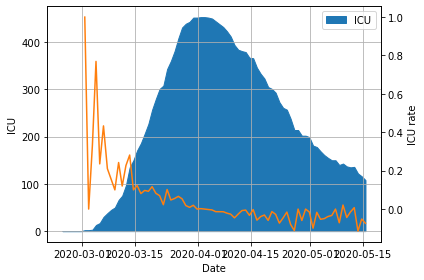

ICU trend of last 7 days:
09 May |    143 |    +3 (+2.10%)
10 May |    137 |    -6 (-4.38%)
11 May |    135 |    -2 (-1.48%)
12 May |    136 |    +1 (+0.74%)
13 May |    122 |   -14 (-11.48%)
14 May |    116 |    -6 (-5.17%)
15 May |    108 |    -8 (-7.41%)


In [17]:
plot_with_rate(piedmont.data, piedmont.terapia_intensiva, 'Date', 'ICU')
print_with_rate(piedmont.data, piedmont.terapia_intensiva, 'ICU')

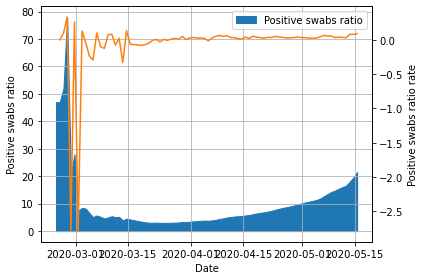

In [18]:
plot_with_rate(piedmont.data, piedmont.tamponi / piedmont.totale_positivi, 'Date', 'Positive swabs ratio')